<a href="https://colab.research.google.com/github/USIS014921/Practica-de-programacion-III/blob/main/IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Laboraorio 2 Computo 2 entrenamientode IA
# Integrantes del Grupo

# Roberto Fransisco Reyes Palomo____USIS032421

# Julio Alexander Maravilla Umañana__USIS018420

# Joan Steven Gomez Contreras___USIS014921

# Rene Gustavo Garcia Gomez_USIS595218

# Entrenamiento IA

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow_datasets as tfds

In [ ]:
#2. Cargamos el dataset
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
#print(dataset["train"])
datos_entrenamiento, datos_prueba = dataset["train"], dataset["test"]

In [ ]:
#monstrar una imagen...
for img in datos_entrenamiento.take(1):
  print(img)
  img = img[0].numpy().reshape(1,28,28,1)
  plt.grid(False)
  plt.imshow(img[0, ..., 0], cmap=plt.cm.binary)

In [ ]:
 #3. #asignar las etiquetas son 10
numeros_letras = ["Playera", "Pantalon", "Sueter", "Vestido", "Abrigo", "Sandalia", "Camisa", "Tenis", "Cartera", "Botas"]

In [ ]:
#4. obtener la cantidad de datos.
#print(metadata)
cantidad_numeros_entrenamiento = metadata.splits["train"].num_examples
cantidad_numeros_prueba = metadata.splits["test"].num_examples
print(cantidad_numeros_entrenamiento, cantidad_numeros_prueba)

60000 10000


In [ ]:
#5. funcion normalizadora de los pixeles de 0 - 255 que sean valores de 0 - 1
def normalizacion(img, label):
  img = tf.cast(img, tf.float32)
  img /= 255 #236/255 = 0.004237288
  return img, label

In [ ]:
#6. Llamamos la funcion normlizadora
datos_entrenamiento = datos_entrenamiento.map(normalizacion)
datos_prueba = datos_prueba.map(normalizacion)

#for img in datos_entrenamiento.take(1):
  #print(img[0])#5.58150468e-08 => 0.0000000558150468

In [ ]:
#7 estructuramos nuestra red neuronal 
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28,1)),
    tf.keras.layers.Dense(64, activation = tf.nn.relu),
    tf.keras.layers.Dense(64, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [ ]:
#8 compilamos el modelo de red neuronal e indicamos las funciones a utilizar 
modelo.compile(
    optimizer= "adam",
    loss = "sparse_categorical_crossentropy",
    metrics =['accuracy']
)

In [ ]:
#9 entrenamiento por lotes
size_lote = 32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(cantidad_numeros_entrenamiento).batch(size_lote)
datos_prueba = datos_prueba.repeat().shuffle(cantidad_numeros_prueba).batch(size_lote)

In [ ]:
#10 entrenando nuestro modelo de datos 
modelo.fit(datos_entrenamiento,epochs= 5,
           steps_per_epoch=math.ceil(cantidad_numeros_entrenamiento/size_lote))

Epoch 1/5
1875/1875 [==============================] - 14s 4ms/step - loss: 0.5094 - accuracy: 0.8199
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3782 - accuracy: 0.8620
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3518 - accuracy: 0.8712
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3226 - accuracy: 0.8812
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3029 - accuracy: 0.8886


In [ ]:
# Evaluamos el modelo con los datos de prueba 
test_loss,test_accuracy = modelo.evaluate(datos_prueba,steps=math.ceil(cantidad_numeros_prueba/size_lote))
print("Resultados de las pruebas", test_loss, test_accuracy) 

313/313 [==============================] - 3s 5ms/step - loss: 0.3721 - accuracy: 0.8636
Resultados de las pruebas 0.37205931544303894 0.8636181950569153


In [ ]:
#graficamos la salida para evaluar los resultados 
def graficar_imagen(i,predictions_array,true_labels,images):
  predictions_array,true_labels,img = predictions_array[i], true_labels[i],images[i]
  plt.grid (False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0],cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_labels:
    color = "blue"
  else: 
     color = "red"
     plt.xlabel("prediccion: {}".format(numeros_letras[predicted_label]), color=color)

In [ ]:
#convertimos los tensores en matrices numpy
for imagenes_prueba,etiquetas_prueba in datos_prueba.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)

8


Text(0.5, 0, 'Prediccion: Cartera')

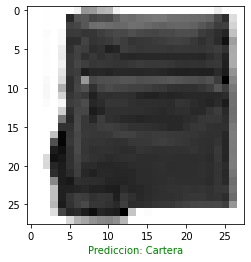

In [ ]:
#pruebas de entrenamiento
i=0
for miImagen, etiqueta in datos_entrenamiento.take(1):
  etiqueta = etiqueta.numpy()
  imagen = miImagen[0].numpy().reshape(1,28,28,1)
  prediccion = modelo.predict(imagen, batch_size= 1)

valor_prediccion = np.argmax(prediccion)
print(valor_prediccion) #etiqueta[i] )

img=imagen
plt.grid(False)
plt.imshow(img[0,...,0], cmap=plt.cm.binary)
plt.xlabel("Prediccion: {}".format(numeros_letras[valor_prediccion]), color="green")

In [ ]:
#Graficamos los valores de la matriz para las imagenes y otra para las graficas de barras segun el acierto 
def graficar_valores_array(i, predictions_array,true_label):
  predictions_array,true_label = predictions_array[i],true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot =plt.bar(range(10),predictions_array,color= "#888888")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label]. set_color('red')
  thisplot[true_label]. set_color('blue')

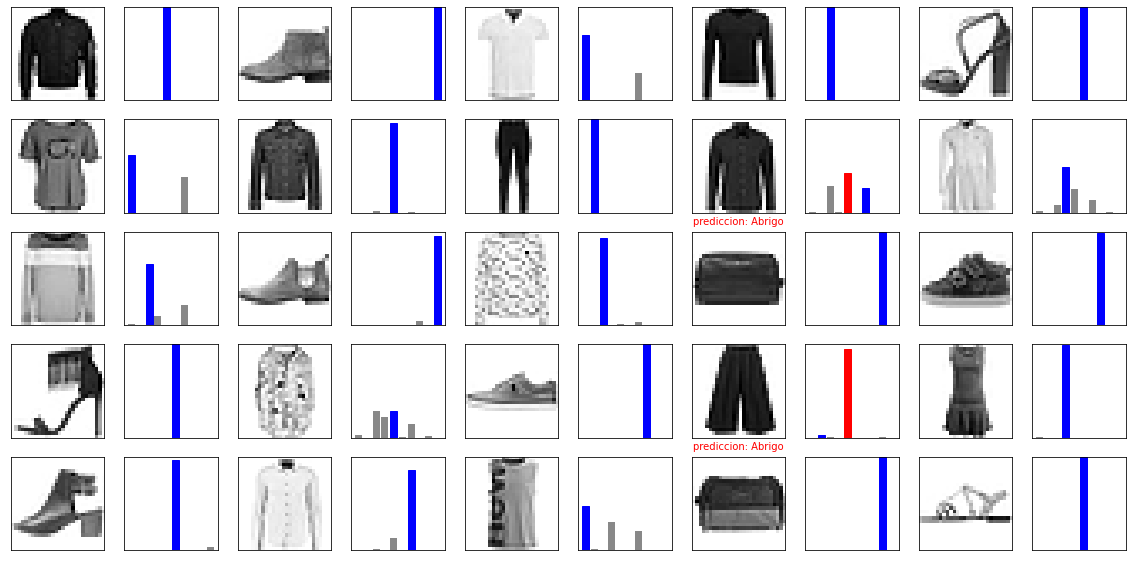

In [ ]:
numrows = 5
numcols = 5
numimages = numrows * numcols

plt.figure(figsize=(2*2*numcols,2*numrows))
for i in range(numimages):
  plt.subplot(numrows,2*numcols,2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(numrows,2*numcols,2*i+2)
  graficar_valores_array(i,predicciones,etiquetas_prueba)

plt.show()

In [ ]:
#creamos nuestro codigo para subir las imagenes 
#y hacemos las pruebas con la iganes ingresadas por el ususario
from google.colab import files
uploaded = files.upload()

Saving abrigo.png to abrigo.png
Saving botas.png to botas.png
Saving camisa.png to camisa.png
Saving cartera.png to cartera.png
Saving pantalon.png to pantalon.png
Saving playera (2).png to playera (2).png
Saving sandalia.png to sandalia.png
Saving sueter.png to sueter.png
Saving tenis.png to tenis.png
Saving vestido.png to vestido.png


4


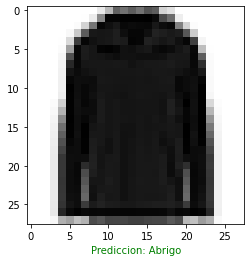

In [ ]:
#Descargue le archivo zip de las imagenes usadas para la prueba final
#link de archivo zip imagenes:https://drive.google.com/file/d/1AB-JQ45rQ1ZhtDrncE_LBcrY_lo-RyCd/view?usp=sharing 
#predicion numero 1
import cv2
#para agregar una imagen cambie el nombre del archivo png que desee predecir
imagen_prueba = cv2.imread("abrigo.png",cv2.IMREAD_GRAYSCALE)
imagen_prueba = cv2.resize(imagen_prueba,(28,28))
img_predic = modelo.predict(imagen_prueba.reshape(1,28,28,1))
valor_prediccion = np.argmax(img_predic)

i=0

plt.grid(False)
plt.imshow(imagen_prueba,cmap=plt.cm.binary)
plt.xlabel("Prediccion: {}".format(numeros_letras[valor_prediccion]), color="green")
print(valor_prediccion)

9


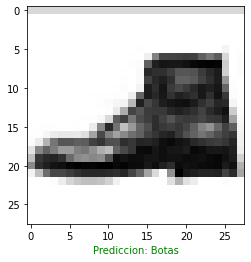

In [ ]:
#predicion numero 2
import cv2
#para agregar una imagen cambie el nombre del archivo png que desee predecir
imagen_prueba = cv2.imread("botas.png",cv2.IMREAD_GRAYSCALE)
imagen_prueba = cv2.resize(imagen_prueba,(28,28))
img_predic = modelo.predict(imagen_prueba.reshape(1,28,28,1))
valor_prediccion = np.argmax(img_predic)

i=0

plt.grid(False)
plt.imshow(imagen_prueba,cmap=plt.cm.binary)
plt.xlabel("Prediccion: {}".format(numeros_letras[valor_prediccion]), color="green")
print(valor_prediccion)

9


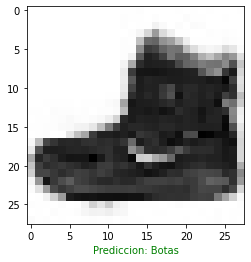

In [ ]:
#predicion numero 3
import cv2
#para agregar una imagen cambie el nombre del archivo png que desee predecir
imagen_prueba = cv2.imread("tenis.png",cv2.IMREAD_GRAYSCALE)
imagen_prueba = cv2.resize(imagen_prueba,(28,28))
img_predic = modelo.predict(imagen_prueba.reshape(1,28,28,1))
valor_prediccion = np.argmax(img_predic)

i=0

plt.grid(False)
plt.imshow(imagen_prueba,cmap=plt.cm.binary)
plt.xlabel("Prediccion: {}".format(numeros_letras[valor_prediccion]), color="green")
print(valor_prediccion)

6


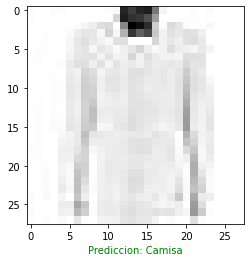

In [ ]:
#predicion numero 4
import cv2
#para agregar una imagen cambie el nombre del archivo png que desee predecir
imagen_prueba = cv2.imread("camisa.png",cv2.IMREAD_GRAYSCALE)
imagen_prueba = cv2.resize(imagen_prueba,(28,28))
img_predic = modelo.predict(imagen_prueba.reshape(1,28,28,1))
valor_prediccion = np.argmax(img_predic)

i=0

plt.grid(False)
plt.imshow(imagen_prueba,cmap=plt.cm.binary)
plt.xlabel("Prediccion: {}".format(numeros_letras[valor_prediccion]), color="green")
print(valor_prediccion)

0


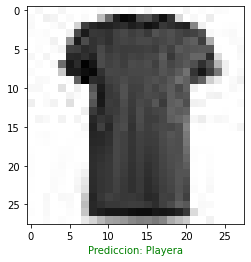

In [ ]:
#predicion numero 5
import cv2
#para agregar una imagen cambie el nombre del archivo png que desee predecir
imagen_prueba = cv2.imread("playera.png",cv2.IMREAD_GRAYSCALE)
imagen_prueba = cv2.resize(imagen_prueba,(28,28))
img_predic = modelo.predict(imagen_prueba.reshape(1,28,28,1))
valor_prediccion = np.argmax(img_predic)

i=0

plt.grid(False)
plt.imshow(imagen_prueba,cmap=plt.cm.binary)
plt.xlabel("Prediccion: {}".format(numeros_letras[valor_prediccion]), color="green")
print(valor_prediccion)

8


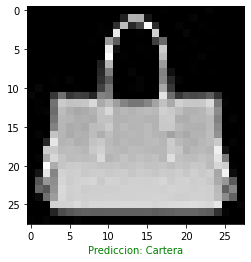

In [ ]:
#predicion numero 6
import cv2
#para agregar una imagen cambie el nombre del archivo png que desee predecir
imagen_prueba = cv2.imread("cartera.png",cv2.IMREAD_GRAYSCALE)
imagen_prueba = cv2.resize(imagen_prueba,(28,28))
img_predic = modelo.predict(imagen_prueba.reshape(1,28,28,1))
valor_prediccion = np.argmax(img_predic)

i=0

plt.grid(False)
plt.imshow(imagen_prueba,cmap=plt.cm.binary)
plt.xlabel("Prediccion: {}".format(numeros_letras[valor_prediccion]), color="green")
print(valor_prediccion)

1


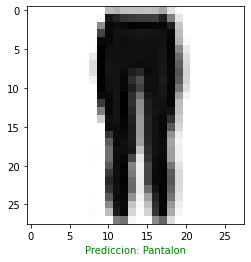

In [ ]:
#predicion numero 7
import cv2
#para agregar una imagen cambie el nombre del archivo png que desee predecir
imagen_prueba = cv2.imread("pantalon.png",cv2.IMREAD_GRAYSCALE)
imagen_prueba = cv2.resize(imagen_prueba,(28,28))
img_predic = modelo.predict(imagen_prueba.reshape(1,28,28,1))
valor_prediccion = np.argmax(img_predic)

i=0

plt.grid(False)
plt.imshow(imagen_prueba,cmap=plt.cm.binary)
plt.xlabel("Prediccion: {}".format(numeros_letras[valor_prediccion]), color="green")
print(valor_prediccion)

2


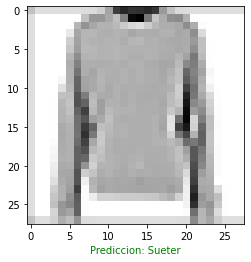

In [ ]:
#predicion numero 8
import cv2
#para agregar una imagen cambie el nombre del archivo png que desee predecir
imagen_prueba = cv2.imread("sueter.png",cv2.IMREAD_GRAYSCALE)
imagen_prueba = cv2.resize(imagen_prueba,(28,28))
img_predic = modelo.predict(imagen_prueba.reshape(1,28,28,1))
valor_prediccion = np.argmax(img_predic)

i=0

plt.grid(False)
plt.imshow(imagen_prueba,cmap=plt.cm.binary)
plt.xlabel("Prediccion: {}".format(numeros_letras[valor_prediccion]), color="green")
print(valor_prediccion)

5


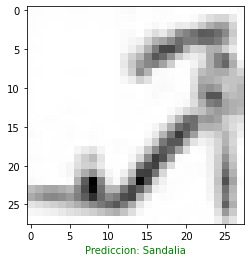

In [ ]:
#predicion numero 9
import cv2
#para agregar una imagen cambie el nombre del archivo png que desee predecir
imagen_prueba = cv2.imread("sandalia.png",cv2.IMREAD_GRAYSCALE)
imagen_prueba = cv2.resize(imagen_prueba,(28,28))
img_predic = modelo.predict(imagen_prueba.reshape(1,28,28,1))
valor_prediccion = np.argmax(img_predic)

i=0

plt.grid(False)
plt.imshow(imagen_prueba,cmap=plt.cm.binary)
plt.xlabel("Prediccion: {}".format(numeros_letras[valor_prediccion]), color="green")
print(valor_prediccion)

3


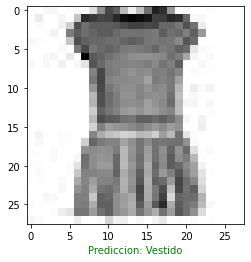

In [ ]:
#predicion numero 10
import cv2
#para agregar una imagen cambie el nombre del archivo png que desee predecir
imagen_prueba = cv2.imread("vestido.png",cv2.IMREAD_GRAYSCALE)
imagen_prueba = cv2.resize(imagen_prueba,(28,28))
img_predic = modelo.predict(imagen_prueba.reshape(1,28,28,1))
valor_prediccion = np.argmax(img_predic)

i=0

plt.grid(False)
plt.imshow(imagen_prueba,cmap=plt.cm.binary)
plt.xlabel("Prediccion: {}".format(numeros_letras[valor_prediccion]), color="green")
print(valor_prediccion)